In [10]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
name = "making_transfer_learning_resnet50_100"
address = "C:\making" # "C:/add_crawling"

### data generator

- ImageDataGenerator에서 label은 folder 명

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode="nearest")
train_generator = train_datagen.flow_from_directory(address, target_size=(300, 300), shuffle=True, batch_size=20, class_mode="categorical")


Found 1201 images belonging to 3 classes.


### model

In [13]:
# conv = VGG16(input_shape=(300, 300, 3), weights="imagenet", include_top=False)
conv = ResNet50(input_shape=(300, 300, 3), weights="imagenet", include_top=False)
conv.trainable = False

# set_trainable = False
# for layer in conv.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [14]:
model = Sequential()
model.add(conv)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
history = model.fit_generator(train_generator, steps_per_epoch=20, epochs=100)

C:\Users\User\AppData\Local\Temp/ipykernel_20900/2874990499.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=20, epochs=100)


Epoch 1/100
20/20 [==============================] - 9s 350ms/step - loss: 21.6729 - accuracy: 0.4100
Epoch 2/100
20/20 [==============================] - 7s 356ms/step - loss: 1.6986 - accuracy: 0.5425
Epoch 3/100
20/20 [==============================] - 7s 340ms/step - loss: 1.5749 - accuracy: 0.5197
Epoch 4/100
20/20 [==============================] - 7s 345ms/step - loss: 1.0963 - accuracy: 0.5643
Epoch 5/100
20/20 [==============================] - 7s 342ms/step - loss: 1.0543 - accuracy: 0.5900
Epoch 6/100
20/20 [==============================] - 7s 344ms/step - loss: 0.8601 - accuracy: 0.6350
Epoch 7/100
20/20 [==============================] - 7s 342ms/step - loss: 0.7749 - accuracy: 0.6575
Epoch 8/100
20/20 [==============================] - 7s 329ms/step - loss: 1.4409 - accuracy: 0.5643
Epoch 9/100
20/20 [==============================] - 7s 331ms/step - loss: 1.2400 - accuracy: 0.5958
Epoch 10/100
20/20 [==============================] - 7s 342ms/step - loss: 1.0212 - accur

### visualization

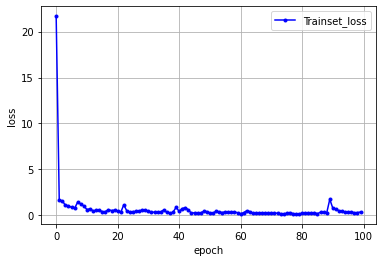

In [17]:
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig(f"{name}.png")

### save

In [18]:
model.save(f"{name}.h5")